In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import requests
import zipfile

URL = 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'


def fetch_zip_file():
    # Try to get the ZIP file
    try:
        response = requests.get(URL)
    except OSError:
        print('No connection to the server!')
        return None

    # check if the request is succesful
    if response.status_code == 200:
        # Save dataset to file
        print('Status 200, OK')
        open('data.zip', 'wb').write(response.content)
    else:
        print('ZIP file request not successful!.')
        return None


def main():
    # Get the ZIP file
    fetch_zip_file()

    # Unzip
    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall()


if __name__ == '__main__':
    main()

Status 200, OK


In [5]:
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import load_img

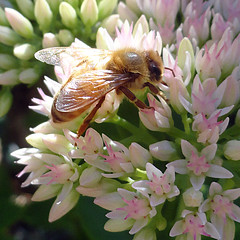

In [7]:
path='./data/train/bee/20997149292_3b5fd09795_m.jpg'
fullnamee=f'{path}'
load_img(fullnamee)

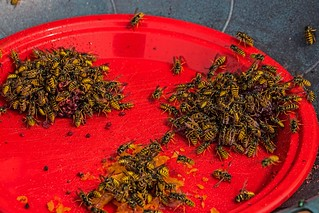

In [8]:
parh_washp='./data/train/wasp/20796142258_22e789fdfb_n.jpg'
fullnamewasp=f'{parh_washp}'
load_img(fullnamewasp)

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3)),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_test_datagen.flow_from_directory(
        './data/train',
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

Found 3677 images belonging to 2 classes.


In [14]:
test_generator = train_test_datagen.flow_from_directory(
        './data/test',
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

Found 918 images belonging to 2 classes.


In [15]:
optimizer=tensorflow.keras.optimizers.SGD(
    learning_rate=0.002,
    momentum=0.8)

In [16]:
loss = tensorflow.keras.losses.BinaryCrossentropy()

In [17]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [18]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 18s 46ms/step - loss: 0.6786 - accuracy: 0.5586 - val_loss: 0.6435 - val_accuracy: 0.6089
Epoch 2/10
184/184 [==============================] - 7s 37ms/step - loss: 0.6335 - accuracy: 0.6309 - val_loss: 0.5955 - val_accuracy: 0.6362
Epoch 3/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5862 - accuracy: 0.6818 - val_loss: 0.5640 - val_accuracy: 0.7298
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5481 - accuracy: 0.7354 - val_loss: 0.5696 - val_accuracy: 0.6917
Epoch 5/10
184/184 [==============================] - 7s 36ms/step - loss: 0.5286 - accuracy: 0.7498 - val_loss: 0.5393 - val_accuracy: 0.7407
Epoch 6/10
184/184 [==============================] - 8s 46ms/step - loss: 0.5184 - accuracy: 0.7487 - val_loss: 0.5346 - val_accuracy: 0.7538
Epoch 7/10
184/184 [==============================] - 7s 36ms/step - loss: 0.4847 - accuracy: 0.7860 - val_loss: 0.5377 - val_accuracy: 0.750

In [19]:
history.history['accuracy']

[0.5586075782775879,
 0.6309491395950317,
 0.6818058490753174,
 0.735382080078125,
 0.7497960329055786,
 0.748708188533783,
 0.7859668135643005,
 0.7848789691925049,
 0.7998368144035339,
 0.8191460371017456]

In [20]:
np.median(history.history['accuracy'])

0.7492521107196808

In [ ]:
#0.75

In [21]:
history.history['loss']

[0.6785725951194763,
 0.6334629058837891,
 0.5861506462097168,
 0.5480711460113525,
 0.5286164879798889,
 0.5183626413345337,
 0.48473381996154785,
 0.4756471514701843,
 0.44822150468826294,
 0.43026965856552124]

In [22]:
np.std(history.history['loss'])

0.07611124691960462

In [23]:
train_test_datagen=ImageDataGenerator(rescale=1./255,rotation_range=50,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

In [24]:
train_generator = train_test_datagen.flow_from_directory(
        './data/train',
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

Found 3677 images belonging to 2 classes.


Found 3677 images belonging to 2 classes.


In [26]:
test_generator = train_test_datagen.flow_from_directory(
        './data/test',
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

Found 918 images belonging to 2 classes.


In [27]:
optimizer=tensorflow.keras.optimizers.SGD(
    learning_rate=0.002,
    momentum=0.8)

In [28]:
loss = tensorflow.keras.losses.BinaryCrossentropy()

In [29]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [30]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 39s 204ms/step - loss: 0.5015 - accuracy: 0.7680 - val_loss: 0.5107 - val_accuracy: 0.7669
Epoch 2/10
184/184 [==============================] - 31s 167ms/step - loss: 0.4863 - accuracy: 0.7707 - val_loss: 0.4854 - val_accuracy: 0.7843
Epoch 3/10
184/184 [==============================] - 30s 163ms/step - loss: 0.4796 - accuracy: 0.7843 - val_loss: 0.5253 - val_accuracy: 0.7386
Epoch 4/10
184/184 [==============================] - 30s 163ms/step - loss: 0.4791 - accuracy: 0.7718 - val_loss: 0.5099 - val_accuracy: 0.7516
Epoch 5/10
184/184 [==============================] - 35s 191ms/step - loss: 0.4774 - accuracy: 0.7759 - val_loss: 0.4757 - val_accuracy: 0.7876
Epoch 6/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4755 - accuracy: 0.7811 - val_loss: 0.4812 - val_accuracy: 0.7930
Epoch 7/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4719 - accuracy: 0.7816 - val_loss: 0.4623 - val_ac

In [32]:
np.mean(history.history['val_loss'])

0.4930460512638092

In [35]:
np.mean(history.history['val_accuracy'][5:])

0.7793028354644775